# EDA - Breast Cancer Wisconsin (Diagnostic)

Notebook de trabajo para TB1:


**1. COMPRENSIÓN DEL NEGOCIO**
****
**Problema:**

Según la OMS, el cáncer de mama es una de las principales causas de mortalidad en mujeres a nivel mundial. En 2022, se diagnosticaron cerca de 2,3 millones de casos nuevos en mujeres y se registraron aproximadamente 670 000 muertes. La detección temprana puede aumentar las posibilidades de supervivencia, cuando se detecta en etapas iniciales, la tasa de curación y éxito del tratamiento es considerablemente más alta.
****

**Objetivo del Proyecto:**

Desarrollar un modelo de clasificación basado que permita predecir la presencia de cáncer de mama a partir del dataset Breast Cancer Wisconsin, utilizando la metodología CRISP-DM para asegurar un proceso estructurado desde el análisis de datos hasta la evaluación del rendimiento del modelo.

****

**Objetivos Específicos:**

- Realizar el entendimiento y exploración inicial del dataset, identificando la distribución de las variables, correlaciones relevantes y características representativas entre tumores benignos y malignos.

- Preprocesar y preparar el conjunto de datos, aplicando limpieza, normalización y codificación necesaria para garantizar la calidad del entrenamiento del modelo.

- Entrenar y comparar distintos algoritmos de clasificación, con el fin de determinar cuál presenta el mejor desempeño predictivo.

- Evaluar los modelos mediante métricas cuantitativas, priorizando el Recall para minimizar falsos negativos en el diagnóstico.

- Implementar visualizaciones interpretativas que faciliten la comprensión de resultados para análisis clínico y presentación.

- Construir una visualización HTML simple, donde el usuario pueda ingresar valores y obtener una predicción del modelo junto con gráficos explicativos.

**2. COMPRENSIÓN DE LOS DATOS**


In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv(r"/content/breast_cancer_wisconsin.csv")
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
print('Shape:', df.shape)
print('\n')
print(df.dtypes)

Shape: (569, 31)


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
w

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [44]:
#Estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [45]:
# Distribución de la variable objetivo (Diagnosis)
df['target'].value_counts() #la variable diagnosis ha sido renombrada a target, por ello se obtiene 0 y 1, para las variables iniciales maligno y benigno, respectivamente.

,count
target,
1,357
0,212


La varibale target: diagnosis tiene valores categóricos:
- M = malignant
- B = benign

Por ello, el tipo de modelo es **Clasificación**. Como el propósito es predecir si un tumor es maligno o benigno, se trata de un problema supervisado de clasificación binaria.

Métricas adecuadas para el caso:
- Accuracy
- Precision
- Recall
- F1-score
- AUC-ROC


In [46]:
# Valores faltantes y duplicados
print(df.isnull().sum())
print('Duplicados:', df.duplicated().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Duplicados: 0


In [47]:
# Detección de outliers (IQR) para: 'mean radius', 'mean area', 'mean concavity'
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum(), lower, upper

for col in ['mean radius','mean area','mean concavity']:
    count, lower, upper = detect_outliers_iqr(df[col])
    print(f"{col}: outliers={count}, lower={lower:.3f}, upper={upper:.3f}")


mean radius: outliers=14, lower=5.580, upper=21.900
mean area: outliers=25, lower=-123.300, upper=1326.300
mean concavity: outliers=18, lower=-0.122, upper=0.282


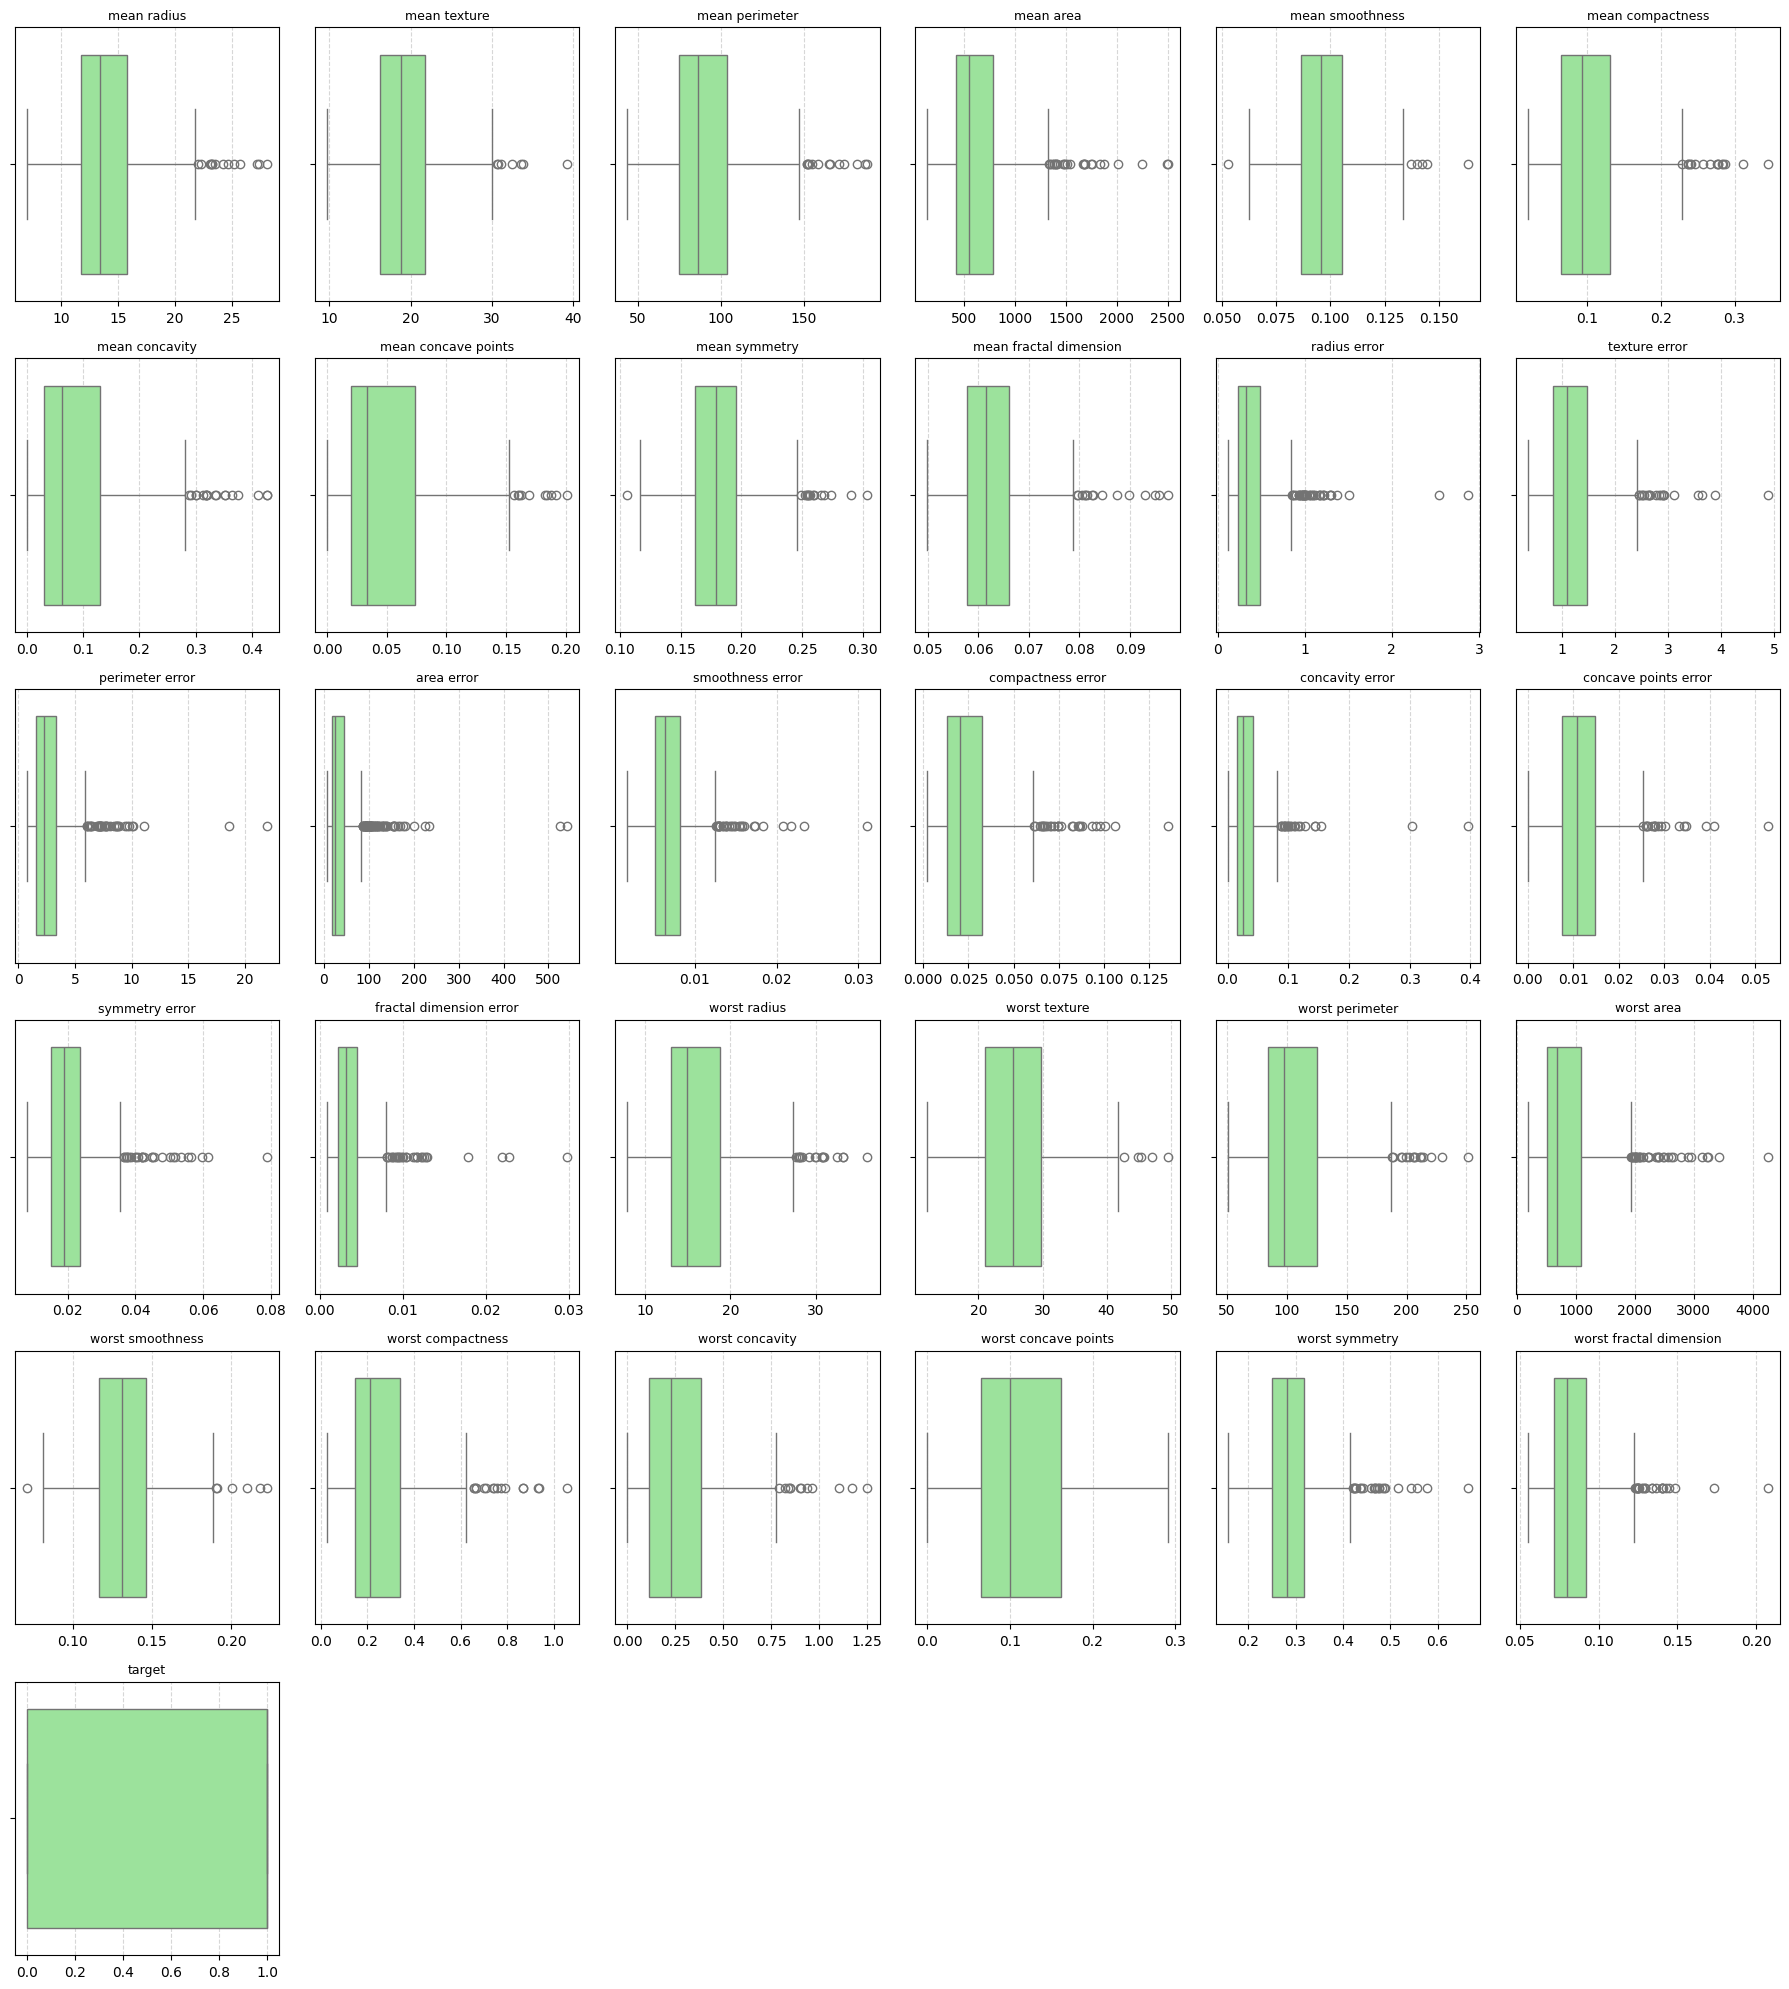

In [48]:
import seaborn as sns
# Seleccionar variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

# Definir cantidad de subplots (por ejemplo, 6 columnas x 6 filas ≈ 31 variables)
n_cols = 6
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Generar los boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(col, fontsize=9)
    axes[i].grid(True, axis='x', linestyle='--', alpha=0.5)
    axes[i].set_xlabel('')

# Eliminar ejes vacíos si hay más subplots que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [49]:
# Crear un DataFrame para resumir
resumen_outliers = pd.DataFrame(columns=['count', 'outliers'])

for col in num_cols:
    datos = df[col].dropna()
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    # límites inferior y superior
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # contar outliers
    outliers_count = ((datos < lower) | (datos > upper)).sum()
    resumen_outliers.loc[col] = [len(datos), outliers_count]
# Ahora agregar el % de outliers
resumen_outliers['% outliers'] = (
    resumen_outliers['outliers'] / resumen_outliers['count'] * 100
).round(2)

# Mostrar resumen
print(resumen_outliers)

                         count  outliers  % outliers
mean radius                569        14        2.46
mean texture               569         7        1.23
mean perimeter             569        13        2.28
mean area                  569        25        4.39
mean smoothness            569         6        1.05
mean compactness           569        16        2.81
mean concavity             569        18        3.16
mean concave points        569        10        1.76
mean symmetry              569        15        2.64
mean fractal dimension     569        15        2.64
radius error               569        38        6.68
texture error              569        20        3.51
perimeter error            569        38        6.68
area error                 569        65       11.42
smoothness error           569        30        5.27
compactness error          569        28        4.92
concavity error            569        22        3.87
concave points error       569        19      

In [50]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.concat([missing, missing_pct], axis=1)
missing_df.columns = ['missing_count', 'missing_pct']

# Mostrar solo columnas con faltantes
print(missing_df[missing_df['missing_count'] > 0])
# Total de faltantes
print("Total valores faltantes:", int(missing.sum().sum()))

Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []
Total valores faltantes: 0


In [51]:
corr = df.corr()['target'].sort_values(ascending=False)
print(corr)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

Las correlaciones negativas más fuertes indican una mayor probabilidad de malignidad.
Las variables con mayor correlación absoluta con target son worst concave points, worst perimeter, mean radius y mean area. Cuando la variable aumenta, es más probable que el tumor sea maligno.

## Visualizaciones principales

Objetivo de cada visualizador:
1. Histograma: ver cómo se distribuye el tamaño promedio del radio de las células según el tipo de tumor.
2. Diagrama de dispersión: ver la relación entre dos características morfológicas y cómo se agrupan según el diagnóstico.
3. Boxplot: comparar la forma o irregularidad de los bordes celulares entre tipos de tumor

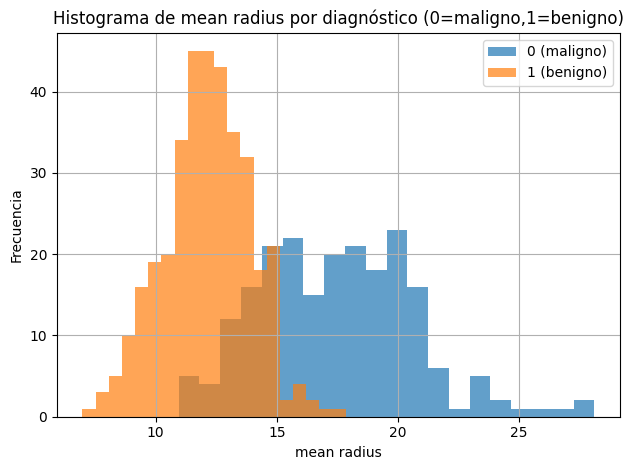

In [52]:
# 1) Histograma de mean radius por target
plt.figure()
df[df['target']==0]['mean radius'].hist(bins=20, alpha=0.7)
df[df['target']==1]['mean radius'].hist(bins=20, alpha=0.7)
plt.title('Histograma de mean radius por diagnóstico (0=maligno,1=benigno)')
plt.xlabel('mean radius')
plt.ylabel('Frecuencia')
plt.legend(['0 (maligno)','1 (benigno)'])
plt.tight_layout()
#plt.savefig(r"/mnt/data/breast_cancer_project/figures/hist_mean_radius.png")
plt.show()

Las distribuciones aparecen solapadas, lo que indica que esta variable por sí sola no permite una separación clara entre ambos diagnósticos. Sin embargo, se observa que los tumores malignos presentan valores más altos de radio promedio, mientras que los benignos tienden a concentrarse en radios menores.
Esto sugiere que el tamaño celular podría ser un indicador parcial del tipo de tumor, pero no es suficiente por sí mismo para clasificarlo con alta precisión.

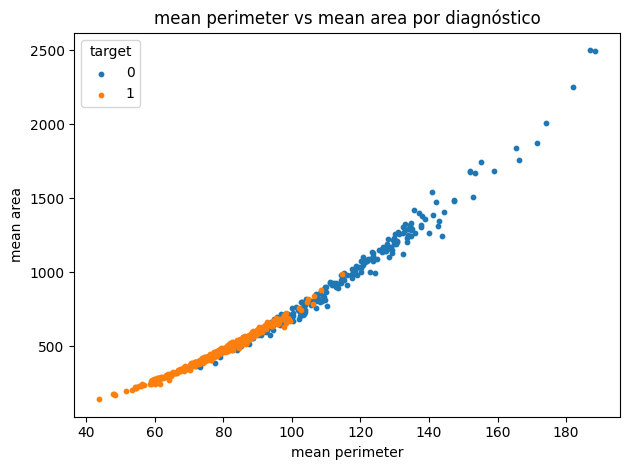

In [53]:
# 2) Scatter mean perimeter vs mean area por target
plt.figure()
for t in df['target'].unique():
    subset = df[df['target']==t]
    plt.scatter(subset['mean perimeter'], subset['mean area'], label=str(t), s=10)
plt.xlabel('mean perimeter')
plt.ylabel('mean area')
plt.title('mean perimeter vs mean area por diagnóstico')
plt.legend(title='target')
plt.tight_layout()
#plt.savefig(r"/mnt/data/breast_cancer_project/figures/scatter_perimeter_area.png")
plt.show()

Se aprecia una correlación positiva clara entre ambas variables, como era de esperarse (mayor perímetro implica mayor área).
Aunque los puntos de ambos diagnósticos se mezclan parcialmente, los tumores malignos tienden a mostrar mayor dispersión y valores más elevados en ambas variables. En contraste, los benignos se agrupan de forma más compacta y con valores menores.
****
Conclusiones:
- Los malignos tienen mayor heterogeneidad celular.
- Los benignos son más homogéneos, es decir, de morfología más uniforme.
- El patrón indica una mayor complejidad morfológica en tumores malignos.

/tmp/ipython-input-3988821763.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['0 (maligno)','1 (benigno)'])


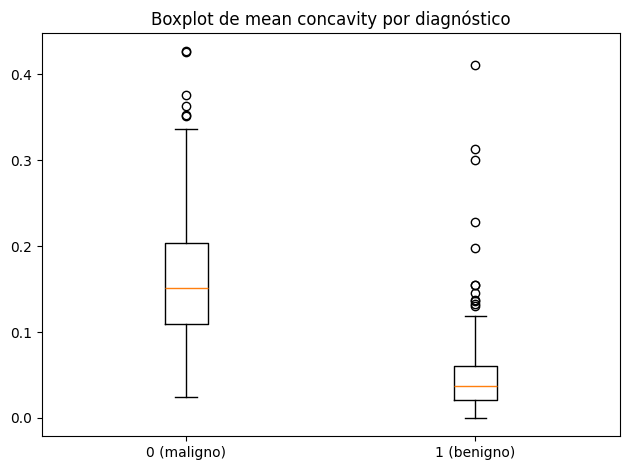

In [54]:
# 3) Boxplot mean concavity por target
plt.figure()
data0 = df[df['target']==0]['mean concavity']
data1 = df[df['target']==1]['mean concavity']
plt.boxplot([data0, data1], labels=['0 (maligno)','1 (benigno)'])
plt.title('Boxplot de mean concavity por diagnóstico')
plt.tight_layout()
plt.show()

Los tumores benignos tienen una caja concentrada por debajo de 0.1, con algunos valores atípicos dispersos, mientras que los tumores malignos presentan una caja entre 0.1 y 0.2, con menos outliers. Esto refleja que los malignos tienden a tener bordes celulares más irregulares y profundos.
****
Conclusiones:
- Variable con buena capacidad discriminante: las medianas no se superponen
- Mayor concavidad es mayor irregularidad celular, típica de tumores malignos.
- La irregularidad es consistente en el grupo maligno por los pocos outliers.

**3. PREPARACIÓN DE LOS DATOS**

---



In [55]:
#Limpieza y estandarización de nombres de columnas
# Convertir nombres de columnas a formato uniforme (snake_case)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar los primeros nombres
df.columns[:10]

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension'],
      dtype='object')

In [56]:
#Codificación de variable objetivo
df = df.rename(columns={'target': 'diagnosis'})
df['diagnosis'] = df['diagnosis'].map({0: 'malignant', 1: 'benign'})

# Codificamos a variable binaria
df['diagnosis_binary'] = df['diagnosis'].map({'malignant': 1, 'benign': 0})

# Revisar distribución de clases
print("Distribución de clases:")
print(df['diagnosis'].value_counts())


Distribución de clases:
diagnosis
benign       357
malignant    212
Name: count, dtype: int64


In [57]:
#Identificación de variables redundantes o correlacionadas

# Verificar correlaciones altas para reducir dimensionalidad si es necesario
corr_matrix = df.drop(columns=['diagnosis', 'diagnosis_binary']).corr()
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix < 1)].stack()
print("Pares de variables altamente correlacionadas (>0.9):")
print(high_corr.head(10))

Pares de variables altamente correlacionadas (>0.9):
mean_radius     mean_perimeter     0.997855
                mean_area          0.987357
                worst_radius       0.969539
                worst_perimeter    0.965137
                worst_area         0.941082
mean_texture    worst_texture      0.912045
mean_perimeter  mean_radius        0.997855
                mean_area          0.986507
                worst_radius       0.969476
                worst_perimeter    0.970387
dtype: float64


In [58]:
#Normalización de variables numéricas

from sklearn.preprocessing import StandardScaler

# Eliminar variables redundantes
redundant_vars = [
    'mean_perimeter', 'mean_area',
    'mean_radius', 'worst_radius',
    'mean_texture'
]

df_reduced = df.drop(columns=redundant_vars)

# Separar las variables numéricas
features = df_reduced.drop(columns=['diagnosis', 'diagnosis_binary'])

# Escalado estándar
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reconstruir DataFrame con nombres de columnas originales
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Unir nuevamente con la variable objetivo
df_prepared = pd.concat([df_scaled, df_reduced[['diagnosis', 'diagnosis_binary']]], axis=1)

print("Dimensiones iniciales:", df.shape)
print("Dimensiones tras reducir:", df_reduced.shape)
print("Dimensiones finales (preparado):", df_prepared.shape)

df_prepared.head()



Dimensiones iniciales: (569, 32)
Dimensiones tras reducir: (569, 27)
Dimensiones finales (preparado): (569, 27)


,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis,diagnosis_binary
0,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,malignant,1
1,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,malignant,1
2,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,malignant,1
3,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,malignant,1
4,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,malignant,1


Variables a eliminar por alta correlación: ['mean_perimeter', 'mean_area', 'mean_concave_points', 'perimeter_error', 'area_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_concave_points']
Dimensiones reducidas: (569, 22)


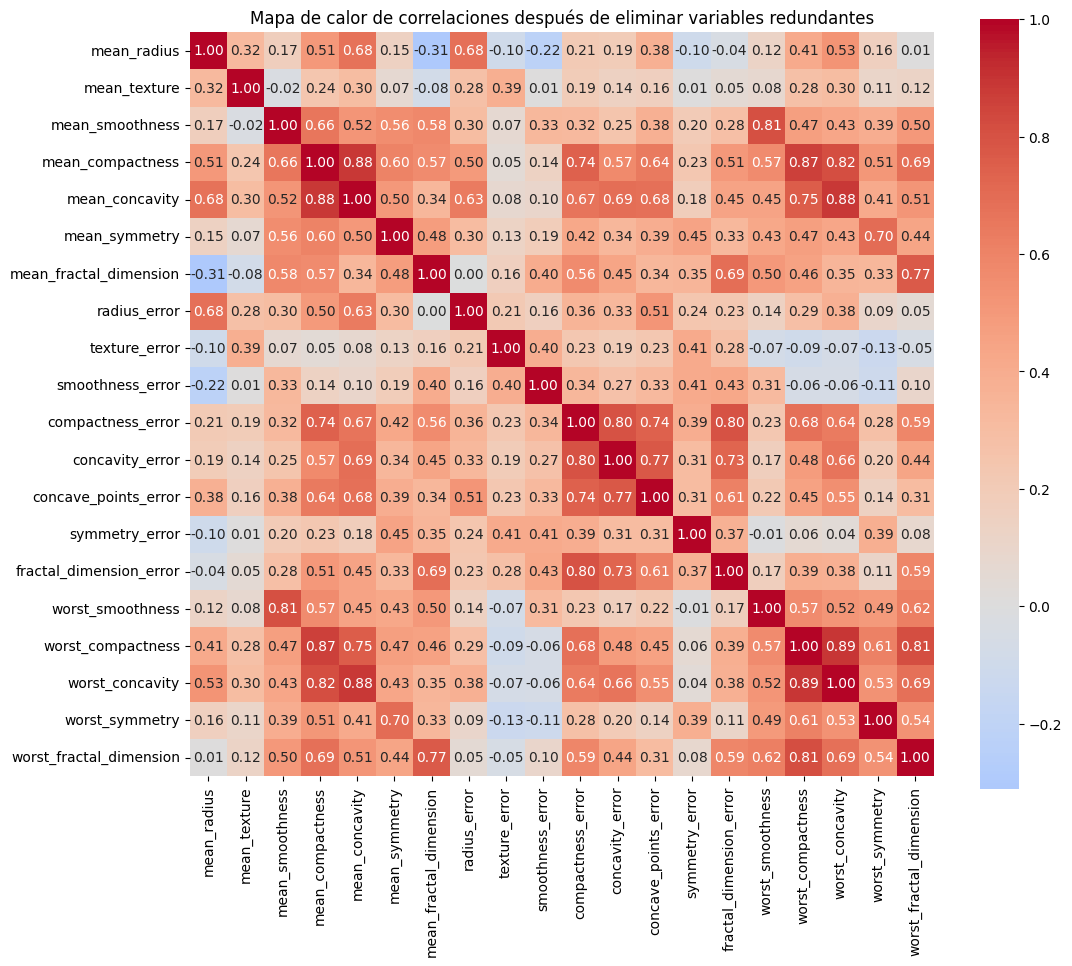

In [59]:
#Verificación de calidad de datos

# Calcular matriz de correlación absoluta
corr_matrix = df.drop(columns=['diagnosis', 'diagnosis_binary']).corr().abs()

# Seleccionar la parte superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identificar variables con correlación > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Variables a eliminar por alta correlación:", to_drop)

# Crear nuevo DataFrame sin esas variables
df_reduced = df.drop(columns=to_drop)

print("Dimensiones reducidas:", df_reduced.shape)

# Heatmap con valores dentro del cuadro
plt.figure(figsize=(12,10))
sns.heatmap(
    df_reduced.drop(columns=['diagnosis', 'diagnosis_binary']).corr(),
    cmap='coolwarm',
    center=0,
    annot=True,        # Muestra el valor en cada cuadrado
    fmt=".2f",         # Formato: dos decimales
    square=True
)
plt.title('Mapa de calor de correlaciones después de eliminar variables redundantes')
plt.show()

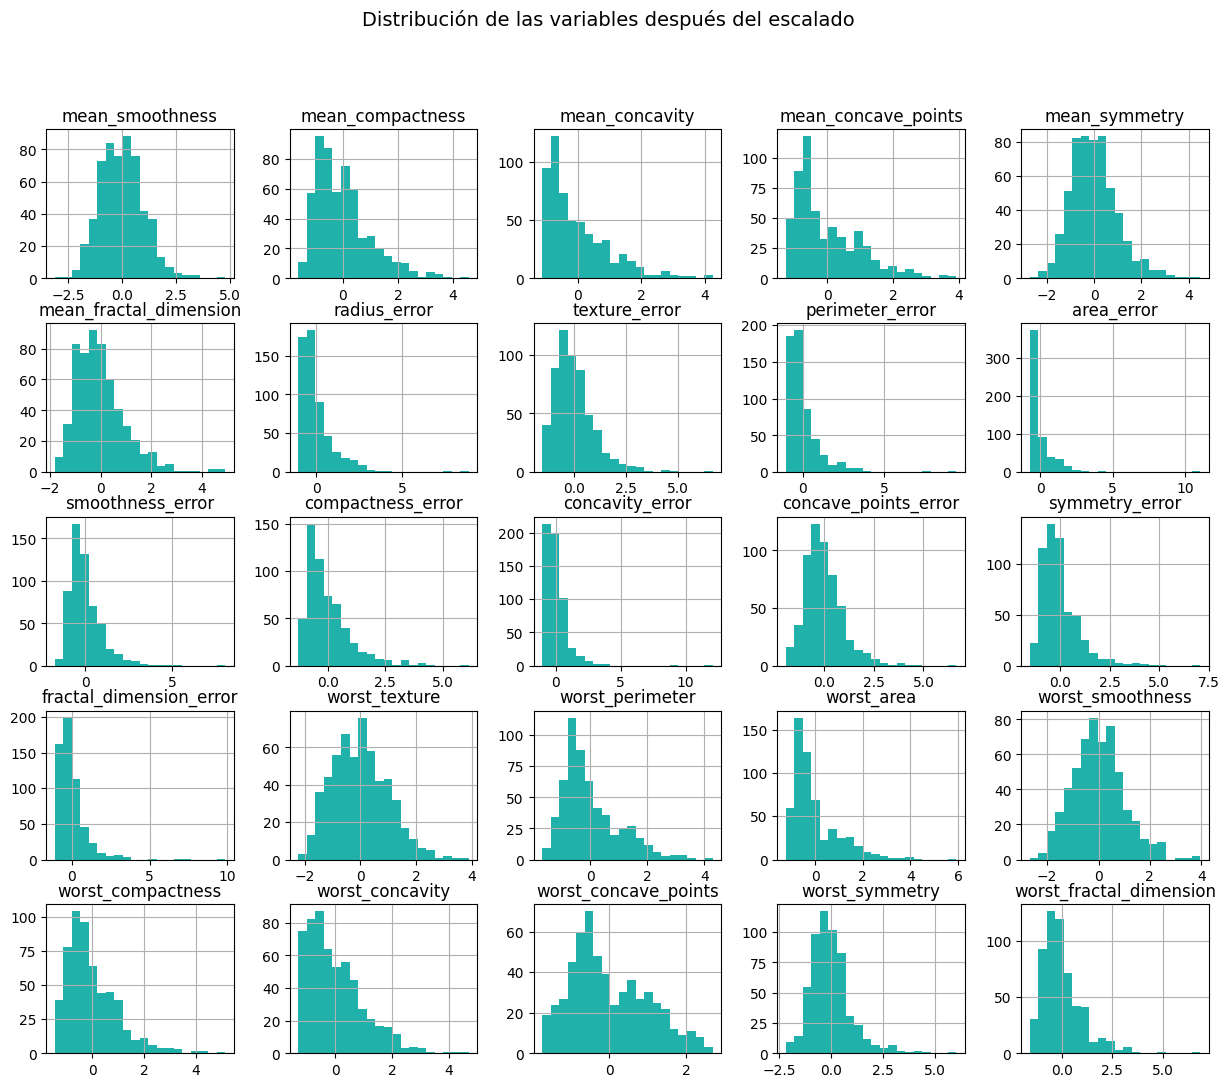

In [60]:
df_prepared.drop(columns=['diagnosis', 'diagnosis_binary']).hist(
    figsize=(15, 12), bins=20, color='lightseagreen')
plt.suptitle('Distribución de las variables después del escalado', fontsize=14)
plt.show()


Se consideró utilizar PCA para reducir dimensionalidad, pero no se decidió aplicar por las siguientes razones:
- Las variables del dataset no presentan multicolinealidad severa.
- Ya se eliminaron las variables redundantes mediante un análisis de correlación (>0.9).
- PCA reduce interpretabilidad, importante para casos clínicos.
- Los modelos basados en árboles como RF y XGBoost no requieren PCA, porque manejan bien alta dimensionalidad y detectan interacciones no lineales.

**4. MODELADO**

---



In [61]:
#Separación de variables predictoras y etiqueta

from sklearn.model_selection import train_test_split
X = df.drop(columns=['diagnosis', 'diagnosis_binary'])
y = df['diagnosis_binary']

#División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#entrenamiento regresión lineal
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=5000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42
    )
}

results = []

In [63]:
#evaluación y matriz de métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    results.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-score": f1_score(y_test, preds),
        "AUC-ROC": roc_auc_score(y_test, probs)
    })

df_results = pd.DataFrame(results)
print("\nMatriz comparativa de métricas:\n")
print(df_results)


Matriz comparativa de métricas:

                Modelo  Accuracy  Precision    Recall  F1-score   AUC-ROC
0  Logistic Regression  0.938596   0.972973  0.857143  0.911392  0.993717
1        Random Forest  0.973684   1.000000  0.928571  0.962963  0.994378
2              XGBoost  0.964912   1.000000  0.904762  0.950000  0.993056


###Análisis de los resultados
- Los tres modelos muestran métricas superiores al 93% en casi todos los indicadores, lo que es un rendimiento excelente.

- Logistic Regression es ligeramente inferior.
- Random Forest es el que clasifica correctamente la mayor proporción de casos.
- RF o XGB tienen precisión del 100%
- Random Forest tiene mejor sensibilidad, detecta más tumores malignos que los otros modelos.
- Random Forest logra la mejor combinación entre detectar malignos y no equivocarse al clasificarlos.
- Todos los modelos tienen un AUC extremadamente alto (>0.99), lo que indica que separan correctamente ambas clases, incluso variando umbrales de decisión.

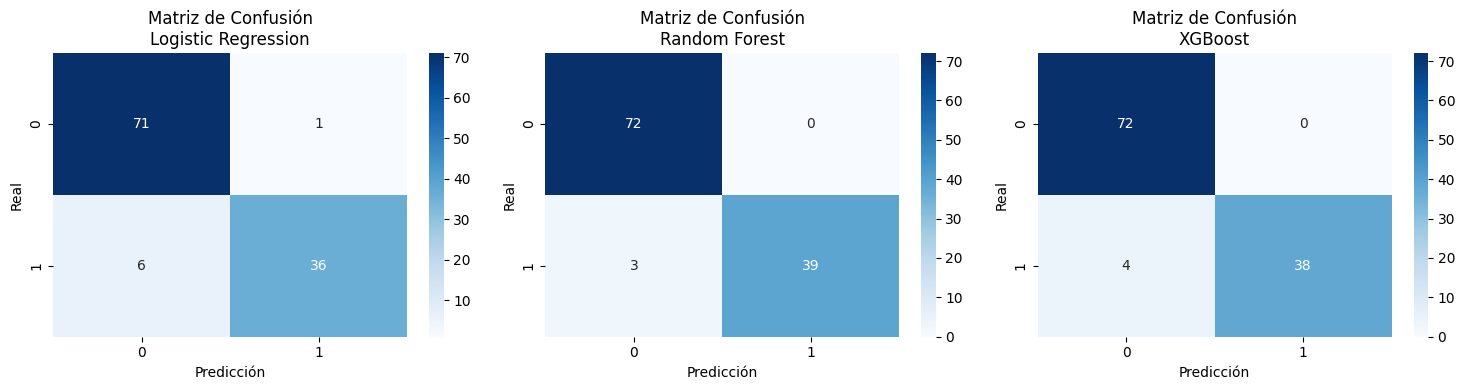

In [64]:
# matrices de confusión
plt.figure(figsize=(15, 4))
for i, (name, model) in enumerate(models.items()):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)

    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.title(f"Matriz de Confusión\n{name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
plt.tight_layout()
plt.show()

- Logistic Regression

  6 falsos negativos (pacientes malignos clasificados como benignos)

  1 falso positivo

  Este patrón explica su recall más bajo.

---

- Random Forest

  Solo 3 falsos negativos

  0 falsos positivos

  Es el comportamiento ideal en un modelo de diagnóstico médico.

---

- XGBoost

  4 falsos negativos

  0 falsos positivos

  Excelente, pero peor que RF.

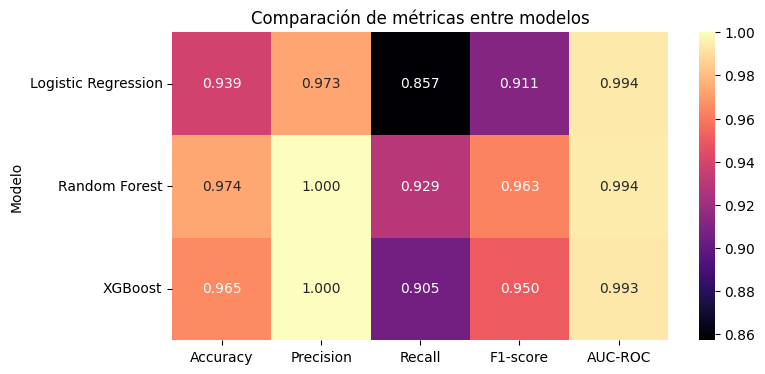

In [65]:
#Comparativo
df_results_plot = df_results.set_index("Modelo")

plt.figure(figsize=(8, 4))
sns.heatmap(df_results_plot, annot=True, cmap="magma", fmt=".3f")
plt.title("Comparación de métricas entre modelos")
plt.show()

Se observa que RF brilla en todas las métricas, especialmente en recall y F1.

Logistic Regression se queda atrás, y XGBoost es muy bueno pero consistentemente un poco peor que Random Forest.

La visualización valida lo ya detectado previamente que **Random Forest** es el mejor modelo globalmente.

**5. EVALUACIÓN**

---

In [66]:
#VALIDACIÓN CRUZADA para RANDOM FOREST

from sklearn.model_selection import KFold, cross_val_score

#Usamos kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#lista de métricas a evaluar
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#iniciamos Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

print("Resultados:")
for metric in scoring_metrics:
    scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=metric)
    print(f"  {metric.capitalize()}: Media = {scores.mean():.4f}, STD = {scores.std():.4f}")

Resultados:
  Accuracy: Media = 0.9604, STD = 0.0088
  Precision: Media = 0.9574, STD = 0.0313
  Recall: Media = 0.9380, STD = 0.0420
  F1: Media = 0.9463, STD = 0.0112
  Roc_auc: Media = 0.9908, STD = 0.0048


In [67]:
#BÚSQUEDA DE HIPERPARÁMETROS

from sklearn.model_selection import GridSearchCV

#Definir parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model_ht = RandomForestClassifier(random_state=42)

#GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model_ht,
    param_grid=param_grid,
    cv=kf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [68]:
#RE-ENTRENAR CON HIPERPARÁMETROS ÓPTIMOS

#Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Optimal Hyperparameters:", best_params)

#Instanciar un nuevo RandomForestClassifier con los hiperparámetros óptimos
optimized_rf_model = RandomForestClassifier(random_state=42, **best_params)

#Entrenar el modelo optimizado con los datos de entrenamiento
optimized_rf_model.fit(X_train, y_train)

#Realizar predicciones sobre el conjunto de prueba
preds_optimized = optimized_rf_model.predict(X_test)
probs_optimized = optimized_rf_model.predict_proba(X_test)[:, 1]

#Calcular y mostrar las métricas de evaluación
accuracy_optimized = accuracy_score(y_test, preds_optimized)
precision_optimized = precision_score(y_test, preds_optimized)
recall_optimized = recall_score(y_test, preds_optimized)
f1_optimized = f1_score(y_test, preds_optimized)
auc_roc_optimized = roc_auc_score(y_test, probs_optimized)

print("\nÓptimo Desempeño de Modelo Random Forest:")
print(f"  Accuracy: {accuracy_optimized:.4f}")
print(f"  Precision: {precision_optimized:.4f}")
print(f"  Recall: {recall_optimized:.4f}")
print(f"  F1-score: {f1_optimized:.4f}")
print(f"  AUC-ROC: {auc_roc_optimized:.4f}")

Optimal Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Óptimo Desempeño de Modelo Random Forest:
  Accuracy: 0.9737
  Precision: 1.0000
  Recall: 0.9286
  F1-score: 0.9630
  AUC-ROC: 0.9944


Top 5 variables importantes:
                variable  importancia
22       worst_perimeter     0.143265
23            worst_area     0.142497
27  worst_concave_points     0.112803
7    mean_concave_points     0.088666
20          worst_radius     0.082650


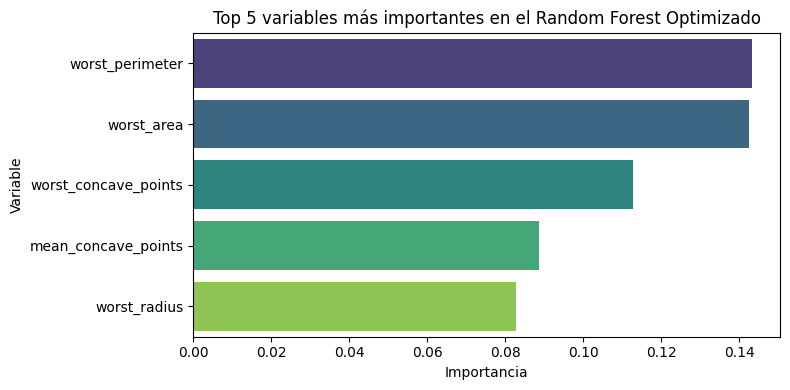

In [69]:
#Acceder al atributo feature_importances_ del modelo optimizado
feature_importances = optimized_rf_model.feature_importances_

#Crear una Serie de Pandas con nombres de características y sus importancias
feature_names = X_train.columns
importances_df = pd.DataFrame({'variable': feature_names, 'importancia': feature_importances})

#Ordenar las características por su importancia de forma descendente
importances_df = importances_df.sort_values(by='importancia', ascending=False)

#Seleccionar las características principales
top_n_features = 5
top_features = importances_df.head(top_n_features)

print(f"Top {top_n_features} variables importantes:")
print(top_features)

#Gráfico de barras para visualizar la importancia de las características principales
plt.figure(figsize=(8, 4))
sns.barplot(x='importancia', y='variable', data=top_features, palette='viridis', hue='variable', legend=False)
plt.title(f'Top {top_n_features} variables más importantes en el Random Forest Optimizado')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

El modelo de Random Forest ha identificado las siguientes 5 variables como las más influyentes en la predicción del diagnóstico de cáncer de mama:

1.  **worst_perimeter (Perímetro promedio de las células más grandes)**

    Esta variable es crucial para la detección temprana, ya que un aumento en el perímetro celular puede ser uno de los primeros indicadores morfológicos de malignidad. Ayuda a diferenciar tumores benignos (con perímetros más pequeños y uniformes) de malignos (con perímetros grandes e irregulares), guiando el diagnóstico y las decisiones de tratamiento.

2.  **worst_area (Área promedio de las células más grandes)**
    
    Proporciona una medida directa de la masa celular del tumor. Un área grande, especialmente en las "peores" muestras, es un biomarcador clave para la identificación de tumores agresivos. Su combinación con el perímetro refuerza la capacidad del modelo para identificar características morfológicas que distinguen entre tipos de tumores, contribuyendo a un diagnóstico más preciso y rápido.

3.  **worst_concave_points (Número de puntos cóncavos promedio de las células más grandes)**
    
    Esta variable es extremadamente importante para el diagnóstico, ya que la irregularidad en la forma celular es un signo patológico directo de la agresión tumoral. Permite a los médicos identificar rápidamente patrones de crecimiento celular anormales, que son vitales para la detección temprana y para determinar la agresividad del cáncer.

4.  **mean_concave_points (Número de puntos cóncavos promedio general)**
    
    Complementa `worst_concave_points` al proporcionar una visión más general de la irregularidad celular en toda la muestra. Ayuda a confirmar la presencia de características malignas de manera consistente en el tejido, mejorando la confianza en los diagnósticos y apoyando la identificación temprana de patrones sutiles de enfermedad.

5.  **worst_radius (Radio promedio de las células más grandes)**
    
    Sirve como un indicador fundamental del tamaño del tumor. Un radio grande en las células más atípicas puede señalar una enfermedad más avanzada o agresiva. Es un factor crítico para el pronóstico y la planificación del tratamiento, contribuyendo a la mejora de los diagnósticos al resaltar la magnitud de la anomalía celular.

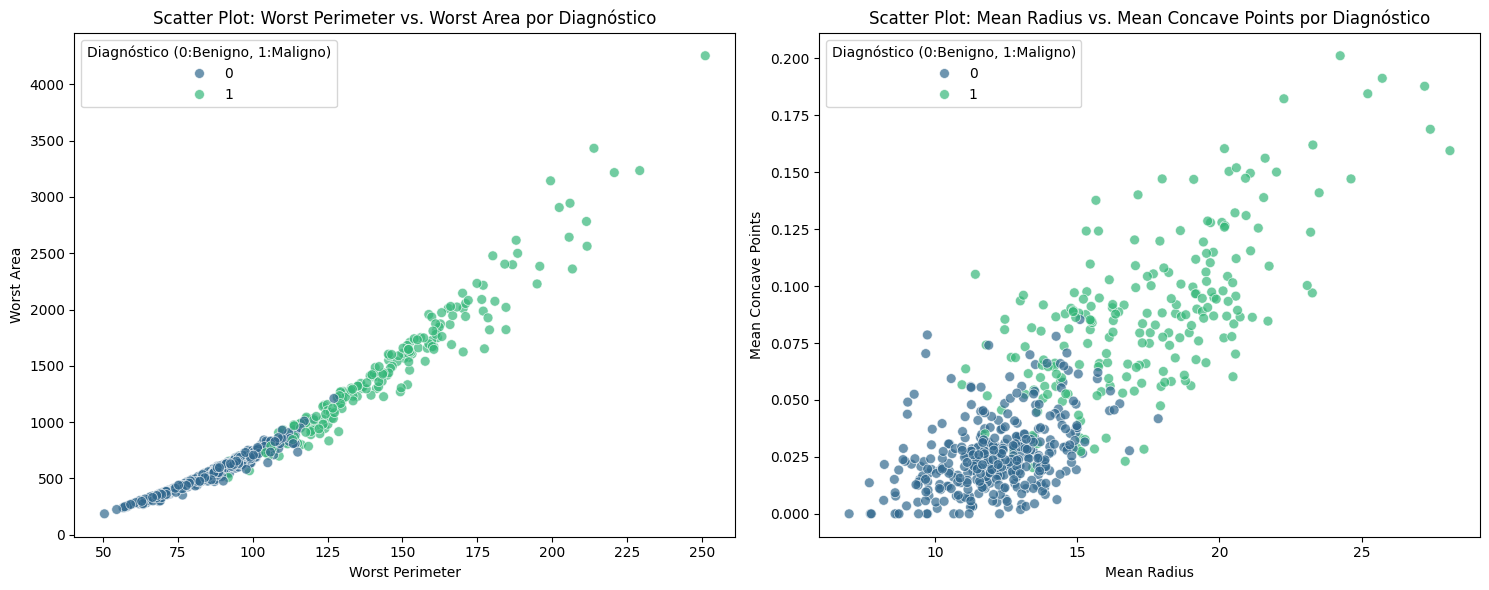

In [70]:
#SCATTER PLOTS

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter Plot para worst_perimeter vs. worst_area
sns.scatterplot(x='worst_perimeter', y='worst_area', hue='diagnosis_binary', data=df, ax=axes[0], palette='viridis', s=50, alpha=0.7)
axes[0].set_title('Scatter Plot: Worst Perimeter vs. Worst Area por Diagnóstico')
axes[0].set_xlabel('Worst Perimeter')
axes[0].set_ylabel('Worst Area')
axes[0].legend(title='Diagnóstico (0:Benigno, 1:Maligno)')

# Scatter Plot para mean_radius vs. mean_concave_points
sns.scatterplot(x='mean_radius', y='mean_concave_points', hue='diagnosis_binary', data=df, ax=axes[1], palette='viridis', s=50, alpha=0.7)
axes[1].set_title('Scatter Plot: Mean Radius vs. Mean Concave Points por Diagnóstico')
axes[1].set_xlabel('Mean Radius')
axes[1].set_ylabel('Mean Concave Points')
axes[1].legend(title='Diagnóstico (0:Benigno, 1:Maligno)')

plt.tight_layout()
plt.show()

El primer gráfico muestra una fuerte correlación positiva entre el peor perímetro y el peor área. Esto indica que los tumores malignos tienden a tener células significativamente más grandes.
Existe una clara separación visual entre las dos clases. La superposición es mínima en las regiones extremas, sugiriendo que umbrales en estas dos variables podrían ser muy efectivos para la clasificación.

El segundo gráfico, se observa que los tumores benignos tienden a tener radios promedio más pequeños y menos puntos cóncavos promedio. Por otro lado, los tumores malignos presentan radios promedio más grandes y un mayor número de puntos cóncavos.
La combinación de tamaño e irregularidad es un indicador de malignidad, y este gráfico lo ilustra claramente al mostrar cómo los tumores malignos exhiben estas dos características de manera conjunta.

In [71]:
# Crear un DataFrame con los resultados de la predicción
predictions_df = pd.DataFrame({
    'Diagnostico actual': y_test,
    'Diagnostico predecido': preds_optimized,
    'Probabilidad de malignidad': probs_optimized
})

# Mapear los valores binarios a etiquetas comprensibles si es necesario (0: Benigno, 1: Maligno)
# Suponiendo que 'diagnosis_binary' 0 es benigno y 1 es maligno
predictions_df['Diagnostico actual etiqueta'] = predictions_df['Diagnostico actual'].map({0: 'Benigno', 1: 'Maligno'})
predictions_df['Diagnostico predecido etiqueta'] = predictions_df['Diagnostico predecido'].map({0: 'Benigno', 1: 'Maligno'})

display(predictions_df.head())


,Diagnostico actual,Diagnostico predecido,Probabilidad de malignidad,Diagnostico actual etiqueta,Diagnostico predecido etiqueta
120,0,0,0.014167,Benigno,Benigno
250,1,1,1.000000,Maligno,Maligno
375,0,0,0.310000,Benigno,Benigno
99,1,1,0.556731,Maligno,Maligno
455,0,0,0.086722,Benigno,Benigno


Este DataFrame muestra el diagnóstico real, el diagnóstico predicho por el modelo  y la probabilidad que el modelo asigna a que el tumor sea maligno para cada una de las instancias en el conjunto de prueba.

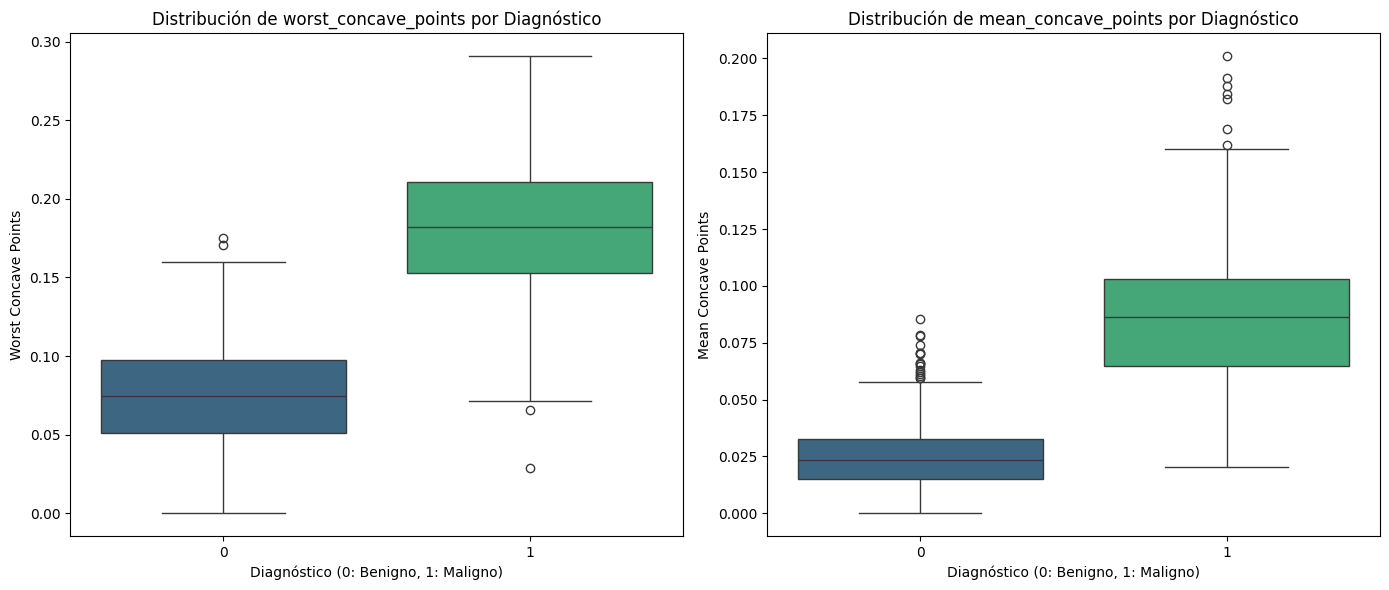

In [84]:
#BOXPLOTS COMPARATIVOS

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Boxplot para worst_concave_points
sns.boxplot(
data=df, x='diagnosis_binary', y='worst_concave_points',
hue='diagnosis_binary', palette='viridis', ax=axes[0], legend=False
)
axes[0].set_title('Distribución de worst_concave_points por Diagnóstico')
axes[0].set_xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
axes[0].set_ylabel('Worst Concave Points')

#Boxplot para mean_concave_points
sns.boxplot(
data=df, x='diagnosis_binary', y='mean_concave_points',
hue='diagnosis_binary', palette='viridis', ax=axes[1], legend=False
)
axes[1].set_title('Distribución de mean_concave_points por Diagnóstico')
axes[1].set_xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
axes[1].set_ylabel('Mean Concave Points')

plt.tight_layout()
plt.show()

En ambos boxplots, se observa una diferencia marcada en la distribución de los puntos cóncavos entre los tumores benignos y malignos. Los tumores malignos presentan valores significativamente más altos y una mayor dispersión en ambas características relacionadas con la concavidad, lo que indica una mayor irregularidad y complejidad en los bordes celulares. Por otro lado, los tumores benignos muestran valores de concavidad menores y más concentrados.

* La falta de superposición en las cajas (IQR) y medianas sugiere que estas variables son excelentes discriminadores entre las clases. Esto es consistente con la patología del cáncer, donde las células malignas a menudo tienen formas más irregulares y bordes más indentados.
* La presencia de outliers en los tumores benignos con valores de concavidad más altos podría indicar casos atípicos o la necesidad de una inspección más detallada en esos subgrupos.

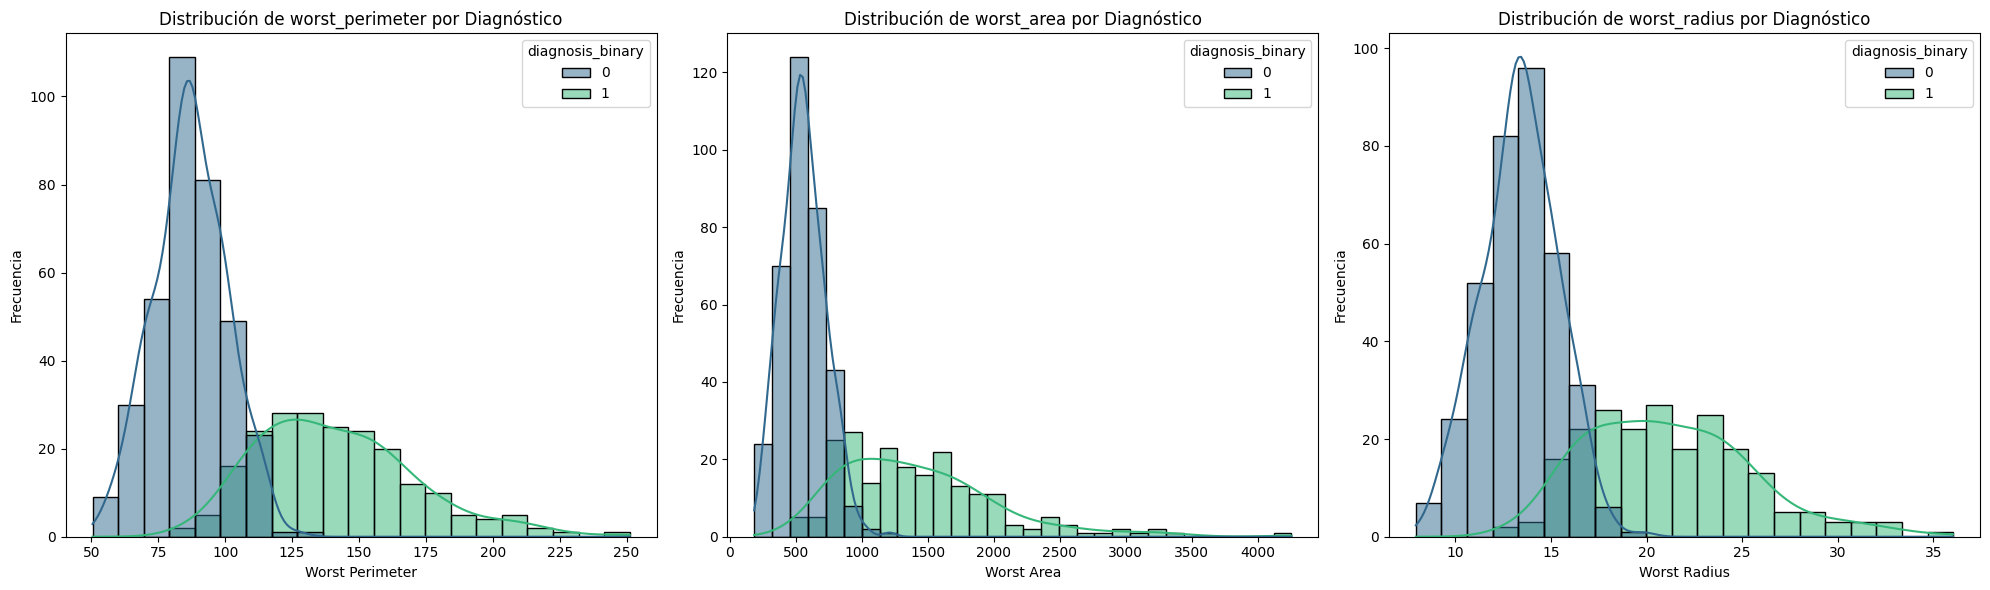

In [73]:
#HISTOGRAMAS COMPARATIVOS

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Histograma para worst_perimeter
sns.histplot(df, x='worst_perimeter', hue='diagnosis_binary', kde=True, ax=axes[0], palette='viridis')
axes[0].set_title('Distribución de worst_perimeter por Diagnóstico')
axes[0].set_xlabel('Worst Perimeter')
axes[0].set_ylabel('Frecuencia')

# Histograma para worst_area
sns.histplot(df, x='worst_area', hue='diagnosis_binary', kde=True, ax=axes[1], palette='viridis')
axes[1].set_title('Distribución de worst_area por Diagnóstico')
axes[1].set_xlabel('Worst Area')
axes[1].set_ylabel('Frecuencia')

# Histograma para worst_radius
sns.histplot(df, x='worst_radius', hue='diagnosis_binary', kde=True, ax=axes[2], palette='viridis')
axes[2].set_title('Distribución de worst_radius por Diagnóstico')
axes[2].set_xlabel('Worst Radius')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En los tres histogramas, se observa una clara separación entre las distribuciones de tumores benignos y malignos. Los tumores malignos consistentemente muestran valores más altos en estas tres características, mientras que los tumores benignos se agrupan en valores inferiores.
* Esta clara distinción refuerza por qué estas variables fueron identificadas como las más importantes por el modelo. Sugiere que el tamaño y la extensión de las células son indicadores muy fuertes de malignidad.
* Las distribuciones para los tumores malignos tienden a ser más amplias y desplazadas hacia la derecha, indicando una mayor variabilidad y valores más grandes, lo cual es coherente con el crecimiento descontrolado y la morfología atípica de las células cancerosas.

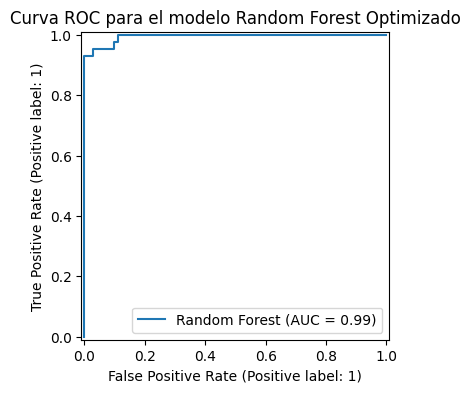

In [74]:
#CURVA ROC

# Crear una figura y ejes para el plot
plt.figure(figsize=(4, 4))
ax = plt.gca()

# Plotear la Curva ROC para el modelo Random Forest optimizado
roc_display = RocCurveDisplay.from_estimator(
    optimized_rf_model, X_test, y_test, ax=ax, name='Random Forest'
)

# Añadir título al plot
plt.title('Curva ROC para el modelo Random Forest Optimizado')

# Mostrar el plot
plt.show()


* La curva ROC se encuentra muy cerca de la esquina superior izquierda del gráfico. Esto es un indicador de un excelente rendimiento del modelo, ya que cuanto más se acerca la curva a este punto, mejor es la capacidad del modelo para distinguir entre las clases positivas y negativas.

* El valor del AUC-ROC es `0.9944` (como se obtuvo en las métricas de evaluación previas). Un valor de AUC cercano a 1.0 indica que el modelo tiene una alta probabilidad de clasificar correctamente un caso positivo como positivo y un caso negativo como negativo. En este contexto, significa que el modelo es muy bueno para diferenciar entre tumores malignos y benignos.

* La curva muestra que el modelo puede lograr una alta tasa de detección de tumores malignos manteniendo una tasa muy baja de clasificaciones erróneas de tumores benignos como malignos.

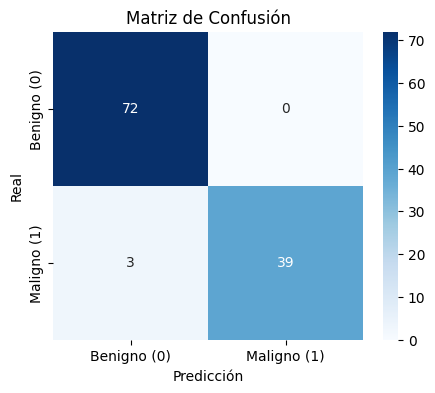

In [75]:
#MATRIZ DE CONFUSIÓN

# Obtener las predicciones del modelo optimizado en el conjunto de prueba
preds_optimized = optimized_rf_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, preds_optimized)

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Benigno (0)', 'Maligno (1)'],
            yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


*   El modelo muestra un número muy bajo de falsos negativos y falsos positivos.
*   La alta concentración en la diagonal principal de la matriz confirma la excelente capacidad del modelo para clasificar correctamente la mayoría de las instancias, tanto benignas como malignas.
*   El valor de los falsos negativos es particularmente importante en este contexto, ya que representa los casos de cáncer no detectados. Un valor bajo indica una alta sensibilidad del modelo para identificar tumores malignos.
*   Los falsos positivos también son importantes, ya que conllevan estrés y procedimientos innecesarios para el paciente. La matriz nos ayuda a ver si el modelo está siendo excesivamente alarmista.

**6. IMPLEMENTACIÓN**

---

In [76]:
# Librería
!pip install streamlit pyngrok joblib scikit-learn

In [77]:
import joblib

# Guardar el modelo optimizado
joblib.dump(optimized_rf_model, 'optimized_rf_model.joblib')
print("Modelo 'optimized_rf_model.joblib' guardado exitosamente.")

Modelo 'optimized_rf_model.joblib' guardado exitosamente.


In [85]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

#Configuración de la página Streamlit
st.set_page_config(
    page_title='Predicción de Cáncer de Mama: Aplicación de CRISP-DM',
    page_icon="🩻",
    layout="wide",
    initial_sidebar_state="expanded"
)

#Cargar el modelo pre-entrenado
@st.cache_resource
def load_model_from_disk():
    model = joblib.load('optimized_rf_model.joblib')
    return model

model = load_model_from_disk()

#Cargar el DataFrame original para visualizaciones y preparación de datos
@st.cache_data
def load_data_and_prepare():
    df_raw = pd.read_csv(r"/content/breast_cancer_wisconsin.csv")

    # Preprocesamiento de datos
    df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(' ', '_')
    df_raw = df_raw.rename(columns={'target': 'diagnosis'})
    # Mapping: 0 from original 'target' was malignant, 1 was benign.
    df_raw['diagnosis_binary'] = df_raw['diagnosis'].map({0: 1, 1: 0})
    X_for_model = df_raw.drop(columns=['diagnosis', 'diagnosis_binary'])
    y = df_raw['diagnosis_binary']

    return df_raw, X_for_model, y

df_for_plots, X_for_model_processed, y_target = load_data_and_prepare()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_for_model_processed, y_target, test_size=0.2, random_state=42, stratify=y_target)

# Recalcular métricas for the optimized RF model using the loaded 'model' (optimized_rf_model)
preds_optimized = model.predict(X_test)
probs_optimized = model.predict_proba(X_test)[:, 1]

accuracy_optimized = accuracy_score(y_test, preds_optimized)
precision_optimized = precision_score(y_test, preds_optimized)
recall_optimized = recall_score(y_test, preds_optimized)
f1_optimized = f1_score(y_test, preds_optimized)
auc_roc_optimized = roc_auc_score(y_test, probs_optimized)

# Recalculate predictions_df
predictions_df = pd.DataFrame({
    'Diagnostico actual': y_test,
    'Diagnostico predecido': preds_optimized,
    'Probabilidad de malignidad': probs_optimized
})
predictions_df['Diagnostico actual etiqueta'] = predictions_df['Diagnostico actual'].map({0: 'Benigno', 1: 'Maligno'})
predictions_df['Diagnostico predecido etiqueta'] = predictions_df['Diagnostico predecido'].map({0: 'Benigno', 1: 'Maligno'})

# Recalculate feature importances
feature_importances = model.feature_importances_
feature_names_for_input = X_for_model_processed.columns.tolist() # Obtener nombres de las 30 características
importances_df = pd.DataFrame({'variable': feature_names_for_input, 'importancia': feature_importances})
importances_df = importances_df.sort_values(by='importancia', ascending=False)
top_n_features = 5
top_features = importances_df.head(top_n_features)

# BARRA LATERAL
st.sidebar.title("➲")
selection = st.sidebar.radio(
    "Ir a",
    [
        "Introducción",
        "Comparación de Modelos",
        "Métricas del RF Optimizado",
        "Análisis de Variables Clave",
        "Evaluación del RF Optimizado",
        "Predicción Interactiva",
        "Conclusiones Finales"
    ]
)

# CONTENIDO PRINCIPAL
st.title('✦ ᴘʀᴇᴅɪᴄᴄɪóɴ ᴅᴇ ᴄáɴᴄᴇʀ ᴅᴇ ᴍᴀᴍᴀ: ᴀᴘʟɪᴄᴀᴄɪóɴ ᴅᴇ ᴄʀɪsᴘ-ᴅᴍ ✦')

if selection == "Introducción":
    st.subheader("➤ Problemática")
    st.write("""
    Según la OMS, el cáncer de mama es una de las principales causas de mortalidad en mujeres a nivel mundial. En 2022, se diagnosticaron cerca de 2,3 millones de casos nuevos en mujeres y se registraron aproximadamente 670 000 muertes. La detección temprana puede aumentar las posibilidades de supervivencia, cuando se detecta en etapas iniciales, la tasa de curación y éxito del tratamiento es considerablemente más alta.
    """)
    st.subheader("➤ Objetivos del Proyecto:")
    st.markdown("""
    Desarrollar un modelo de clasificación basado que permita predecir la presencia de cáncer de mama a partir del dataset Breast Cancer Wisconsin, utilizando la metodología CRISP-DM para asegurar un proceso estructurado desde el análisis de datos hasta la evaluación del rendimiento del modelo.
    """)
    st.subheader("➤ Objetivos Específicos:")
    st.markdown("""
    - Realizar el entendimiento y exploración inicial del dataset, identificando la distribución de las variables,
      correlaciones relevantes y características representativas entre tumores benignos y malignos.
    - Preprocesar y preparar el conjunto de datos, aplicando limpieza, normalización y codificación necesaria para
      garantizar la calidad del entrenamiento del modelo.
    - Entrenar y comparar distintos algoritmos de clasificación, con el fin de determinar cuál presenta el mejor
      desempeño predictivo.
    - Evaluar los modelos mediante métricas cuantitativas, priorizando el Recall para minimizar falsos negativos
      en el diagnóstico.
    - Implementar visualizaciones interpretativas que faciliten la comprensión de resultados para análisis clínico
      y presentación.
    - Construir una visualización HTML simple, donde el usuario pueda ingresar valores y obtener una predicción del
      modelo junto con gráficos explicativos.
    """)
    st.image("/content/1_pxFCmhRFTighUn88baLcSA.png", caption="Cáncer de Mama", use_container_width=False)

elif selection == "Comparación de Modelos":
    st.header("Comparación de Modelos de Clasificación")
    st.write("Se evaluaron 3 modelos de clasificación para determinar cuál ofrece el mejor rendimiento en la predicción del cáncer de mama.")

    df_results_data = {
        "Modelo": ["Logistic Regression", "Random Forest", "XGBoost"],
        "Accuracy": [0.938596, 0.973684, 0.964912],
        "Precision": [0.972973, 1.000000, 1.000000],
        "Recall": [0.857143, 0.928571, 0.904762],
        "F1-score": [0.911392, 0.962963, 0.950000],
        "AUC-ROC": [0.993717, 0.994378, 0.993056]
    }
    df_results = pd.DataFrame(df_results_data)
    st.dataframe(df_results)
    st.markdown("""
    - Los tres modelos muestran métricas superiores al 93% en casi todos los indicadores, lo que es un rendimiento excelente.
    - **Random Forest** fue seleccionado como el mejor modelo debido a su combinación de alta precisión y recall, minimizando los falsos negativos.
    """)

    # Matriz de calor de métricas
    st.subheader("➤ Visualización Comparativa de Métricas")
    df_results_plot = df_results.set_index("Modelo")
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.heatmap(df_results_plot, annot=True, cmap="magma", fmt=".3f", ax=ax)
    ax.set_title("Comparación de métricas entre modelos")
    st.pyplot(fig)
    plt.close(fig)

elif selection == "Métricas del RF Optimizado":
    st.header("Métricas del Modelo Random Forest Optimizado")
    st.write("Rendimiento detallado del modelo Random Forest con hiperparámetros óptimos en el conjunto de prueba.")

    metrics_df = pd.DataFrame({
        "Métrica": ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"],
        "Valor": [accuracy_optimized, precision_optimized, recall_optimized, f1_optimized, auc_roc_optimized]
    })
    st.dataframe(metrics_df.set_index("Métrica"))

    st.markdown("""
    - **Accuracy**: Proporción de predicciones correctas.
    - **Precision**: De las predicciones positivas, cuántas fueron realmente positivas (minimiza falsos positivos).
    - **Recall (Sensibilidad)**: De todos los casos positivos reales, cuántos fueron correctamente identificados (minimiza falsos negativos).
    - **F1-score**: Media armónica de precisión y recall.
    - **AUC-ROC**: Capacidad del modelo para distinguir entre clases.
    """)

    st.subheader("➤ Matriz de Confusión")
    cm = confusion_matrix(y_test, preds_optimized)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Benigno (0)', 'Maligno (1)'],
                yticklabels=['Benigno (0)', 'Maligno (1)'], ax=ax)
    ax.set_title('Matriz de Confusión del RF Optimizado')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')
    st.pyplot(fig)
    plt.close(fig)

    st.markdown("""
    - La matriz de confusión muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
    - Un bajo número de falsos negativos es lo prioritario en el diagnóstico de cáncer para evitar diagnósticos erróneos.
    """)

elif selection == "Análisis de Variables Clave":
    st.header("Top 5 Variables Más Importantes")
    st.write("Las características que más contribuyen a la predicción del modelo Random Forest.")

    st.dataframe(top_features.set_index('variable'))

    # Gráfico de barras de importancia de características
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x='importancia', y='variable', data=top_features, palette='viridis', hue='variable', legend=False, ax=ax)
    ax.set_title(f'Top {top_n_features} Variables más Importantes en el Random Forest Optimizado')
    ax.set_xlabel('Importancia')
    ax.set_ylabel('Variable')
    st.pyplot(fig)
    plt.close(fig)

    st.subheader("➤ Visualizaciones de Variables Clave")
    st.write("Exploración visual de cómo estas variables se relacionan con el diagnóstico.")

    # Scatter Plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Scatter Plot para worst_perimeter vs. worst_area
    sns.scatterplot(x='worst_perimeter', y='worst_area', hue='diagnosis_binary', data=df_for_plots, ax=axes[0], palette='viridis', s=50, alpha=0.7)
    axes[0].set_title('Scatter Plot: Worst Perimeter vs. Worst Area por Diagnóstico')
    axes[0].set_xlabel('Worst Perimeter')
    axes[0].set_ylabel('Worst Area')
    axes[0].legend(title='Diagnóstico (0:Benigno, 1:Maligno)')

    # Scatter Plot para mean_radius vs. mean_concave_points
    sns.scatterplot(x='mean_radius', y='mean_concave_points', hue='diagnosis_binary', data=df_for_plots, ax=axes[1], palette='viridis', s=50, alpha=0.7)
    axes[1].set_title('Scatter Plot: Mean Radius vs. Mean Concave Points por Diagnóstico')
    axes[1].set_xlabel('Mean Radius')
    axes[1].set_ylabel('Mean Concave Points')
    axes[1].legend(title='Diagnóstico (0:Benigno, 1:Maligno)')

    st.pyplot(fig)
    plt.close(fig)

    st.markdown("""
    - El primer gráfico muestra una fuerte correlación positiva entre el peor perímetro y el peor área. Esto indica que los tumores malignos tienden a tener células significativamente más grandes.
    - El segundo gráfico ilustra cómo la combinación de tamaño e irregularidad es un fuerte indicador de malignidad.
    """)

    # Boxplots Comparativos
    st.subheader("➤ Boxplots Comparativos de Puntos Cóncavos")
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot para worst_concave_points
    sns.boxplot(x='diagnosis_binary', y='worst_concave_points', data=df_for_plots, ax=axes[0], palette='viridis', hue='diagnosis_binary', legend=False) # Agregado hue y legend
    axes[0].set_title('Distribución de worst_concave_points por Diagnóstico')
    axes[0].set_xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
    axes[0].set_ylabel('Worst Concave Points')

    # Boxplot para mean_concave_points
    sns.boxplot(x='diagnosis_binary', y='mean_concave_points', data=df_for_plots, ax=axes[1], palette='viridis', hue='diagnosis_binary', legend=False) # Agregado hue y legend
    axes[1].set_title('Distribución de mean_concave_points por Diagnóstico')
    axes[1].set_xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
    axes[1].set_ylabel('Mean Concave Points')

    st.pyplot(fig)
    plt.close(fig)

    st.markdown("""
    - Los boxplots muestran una diferencia marcada en la distribución de los puntos cóncavos, indicando mayor irregularidad y complejidad en los bordes celulares de los tumores malignos.
    """)

    # Histogramas Comparativos
    st.subheader("➤ Histogramas de Distribución de Variables Clave")
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Histograma para worst_perimeter
    sns.histplot(df_for_plots, x='worst_perimeter', hue='diagnosis_binary', kde=True, ax=axes[0], palette='viridis')
    axes[0].set_title('Distribución de worst_perimeter por Diagnóstico')
    axes[0].set_xlabel('Worst Perimeter')
    axes[0].set_ylabel('Frecuencia')

    # Histograma para worst_area
    sns.histplot(df_for_plots, x='worst_area', hue='diagnosis_binary', kde=True, ax=axes[1], palette='viridis')
    axes[1].set_title('Distribución de worst_area por Diagnóstico')
    axes[1].set_xlabel('Worst Area')
    axes[1].set_ylabel('Frecuencia')

    # Histograma para worst_radius
    sns.histplot(df_for_plots, x='worst_radius', hue='diagnosis_binary', kde=True, ax=axes[2], palette='viridis')
    axes[2].set_title('Distribución de worst_radius por Diagnóstico')
    axes[2].set_xlabel('Worst Radius')
    axes[2].set_ylabel('Frecuencia')

    st.pyplot(fig)
    plt.close(fig)

    st.markdown("""
    - Los histogramas muestran una clara separación en la distribución de estas tres variables entre tumores benignos y malignos, confirmando su importancia.
    """)

elif selection == "Evaluación del RF Optimizado":
    st.header("Evaluación Detallada del Modelo Random Forest Optimizado")

    st.subheader("➤ Curva ROC")
    fig, ax = plt.subplots(figsize=(15, 4))
    roc_display = RocCurveDisplay.from_estimator(
        model, X_test, y_test, ax=ax, name='Optimized Random Forest'
    )
    ax.set_title('Curva ROC para el modelo Random Forest Optimizado')
    st.pyplot(fig)
    plt.close(fig)

    st.markdown("""
    - La curva ROC muestra una excelente capacidad del modelo para distinguir entre clases, con un área bajo la curva (AUC) de aproximadamente **0.9944**.
    - Un AUC cercano a 1.0 indica que el modelo tiene una alta probabilidad de clasificar correctamente los casos.
    """)

    st.subheader("➤ Predicciones Detalladas")
    st.write("Muestra las predicciones del modelo en una parte del conjunto de prueba.")
    st.dataframe(predictions_df.head(10))

elif selection == "Predicción Interactiva":
    st.header("Realizar una Predicción de Cáncer de Mama")
    st.write("Ajusta los valores de las características del tumor para obtener una predicción.")

    # Crear la interfaz de usuario para la entrada de datos
    user_input_data = {}
    st.sidebar.subheader("Valores de las Características del Tumor")

    # Obtener valores min, max y mean de X_for_model_processed para sliders
    min_vals = X_for_model_processed.min()
    max_vals = X_for_model_processed.max()
    mean_vals = X_for_model_processed.mean()

    for feature_name in feature_names_for_input:
        # Usar slider para float y number_input para int
        default_value = float(mean_vals[feature_name])
        min_value = float(min_vals[feature_name])
        max_value = float(max_vals[feature_name])

        # Asegurar que el valor por defecto esté dentro del rango min/max
        if not (min_value <= default_value <= max_value):
            default_value = min_value # Fallback if mean is outside range for some reason

        user_input_data[feature_name] = st.sidebar.slider(
            f"{feature_name.replace('_', ' ').title()}",
            min_value=min_value,
            max_value=max_value,
            value=default_value,
            step=(max_value - min_value) / 100.0
        )

    input_df = pd.DataFrame([user_input_data])

    # Realizar la predicción
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)[:, 1]

    st.subheader("Resultados de la Predicción:")
    if prediction[0] == 1:
        st.error(f"El tumor es **Maligno** con una probabilidad del **{prediction_proba[0]*100:.2f}%**.")
        st.markdown("<p style='color:red;'>Se recomienda una evaluación médica urgente.</p>", unsafe_allow_html=True)
    else:
        st.success(f"El tumor es **Benigno** con una probabilidad del **{(1 - prediction_proba[0])*100:.2f}%**.")
        st.markdown("<p style='color:green;'>El riesgo de malignidad es bajo, pero se recomienda seguimiento médico.</p>", unsafe_allow_html=True)

    st.write("---")
    st.subheader("Valores de Entrada:")
    st.dataframe(input_df.T.rename(columns={0: 'Valor Ingresado'}))

elif selection == "Conclusiones Finales":
    st.header("Conclusiones y Recomendaciones")
    st.write("""
    El desarrollo de este proyecto siguiendo la metodología CRISP-DM ha permitido identificar
    que el modelo **Random Forest** ofrece un rendimiento excepcional para la predicción
    del cáncer de mama, con alta precisión y un muy bajo número de falsos negativos.
    """)

    st.subheader("Hallazgos Clave:")
    st.markdown("""
    - Las características morfológicas como el perímetro, área, radio y los puntos cóncavos de las células son los indicadores más influyentes en el diagnóstico.
    - El modelo Random Forest supera a la Regresión Logística y XGBoost en este contexto.
    - La alta métrica de Recall (0.9286) y AUC-ROC (0.9944) demuestran la robustez del modelo.
    """)

    st.subheader("Recomendaciones:")
    st.markdown("""
    - Probar el modelo con conjuntos de datos de diferentes fuentes para asegurar su generalización.
    - Aunque Random Forest es menos interpretable que otros modelos, técnicas como SHAP o LIME podrían ofrecer mayor transparencia.
    - Explorar la integración de este modelo en sistemas de apoyo a la decisión clínica para asistir a los profesionales de la salud.
    - Monitorear el rendimiento del modelo en producción y reentrenarlo periódicamente con nuevos datos.
    """)

    st.info("Gracias por revisar este dashboard. ¡La detección temprana salva vidas!")


Overwriting app.py


In [86]:
import os

# Verificar que el archivo app.py se haya creado
if 'app.py' in os.listdir():
    print("El archivo 'app.py' se ha creado exitosamente.")
else:
    print("Error: El archivo 'app.py' no se encontró.")

# También podemos listar todos los archivos para confirmación visual
!ls -F

El archivo 'app.py' se ha creado exitosamente.
1_pxFCmhRFTighUn88baLcSA.png  breast_cancer_wisconsin.csv  sample_data/
app.py			      optimized_rf_model.joblib


In [87]:
from pyngrok import ngrok
import time

ngrok.kill()
ngrok.set_auth_token("35uUbX5T7aRSdWPRju30rpLVVbO_6u75Yx9uZnXmTbh2A5e3D")
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')
time.sleep(5)
public_url = ngrok.connect("http://localhost:8501")
print("Accede al dashboard aquí (ngrok):", public_url)

Accede al dashboard aquí (ngrok): NgrokTunnel: "https://unvigorously-vicarious-emerita.ngrok-free.dev" -> "http://localhost:8501"
